In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median, gaussian, prewitt, prewitt_h, prewitt_v, threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb

In [2]:
def histogram_strech(image, target_min, target_max, isFloat=False):
    """
    Stretches an image to a custom range of values.
    
    Parameters:
    -----------
    image : ndarray
        Input image (float or uint8)
    target_min : float or int
        Desired minimum value for the output image
    target_max : float or int
        Desired maximum value for the output image
    isFloat : bool
        If True, assumes input is float image (-1 to 1)
        If False, assumes input is uint8 image (0 to 255)
        
    Returns:
    --------
    ndarray
        Stretched image with values between target_min and target_max
    """
    
    # Make a copy to avoid modifying the original
    img = image.copy()
    
    # Get current min and max values
    current_min = np.min(img)
    current_max = np.max(img)
    
    # Handle empty range case
    if current_min == current_max:
        return np.full_like(img, target_min)
    
    # Define input range based on image type
    if isFloat:
        input_min = -1.0
        input_max = 1.0
    else:
        input_min = 0
        input_max = 255
    
    # First normalize to 0-1 range
    normalized = (img - current_min) / (current_max - current_min)
    
    # Then scale to input range
    scaled = normalized * (input_max - input_min) + input_min
    
    # Finally stretch to target range
    stretched = (scaled - input_min) / (input_max - input_min) * (target_max - target_min) + target_min
    
    return stretched

# Cartesian View

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

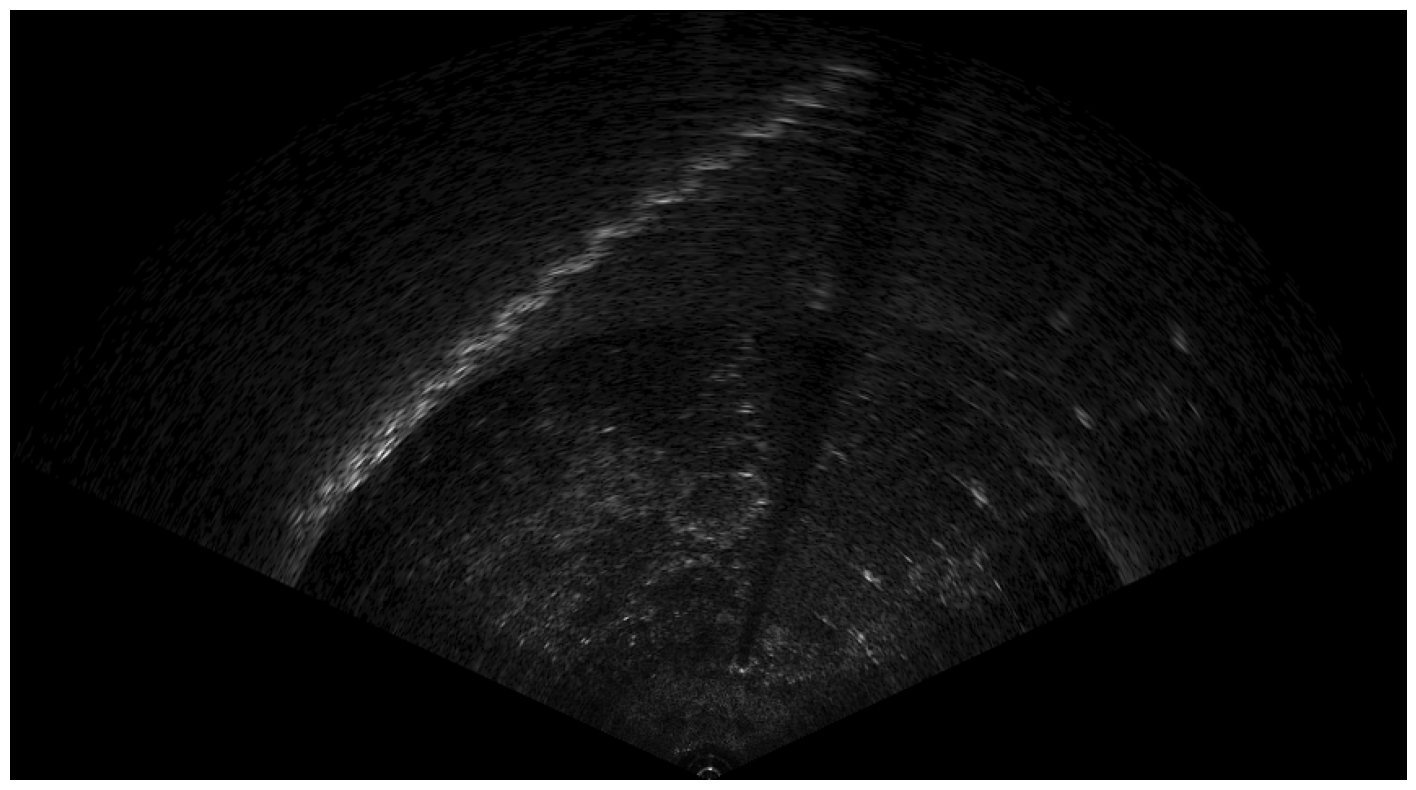

In [15]:
img = np.load("samples/cart_image.npy")
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap="gray")
plt.axis("off")

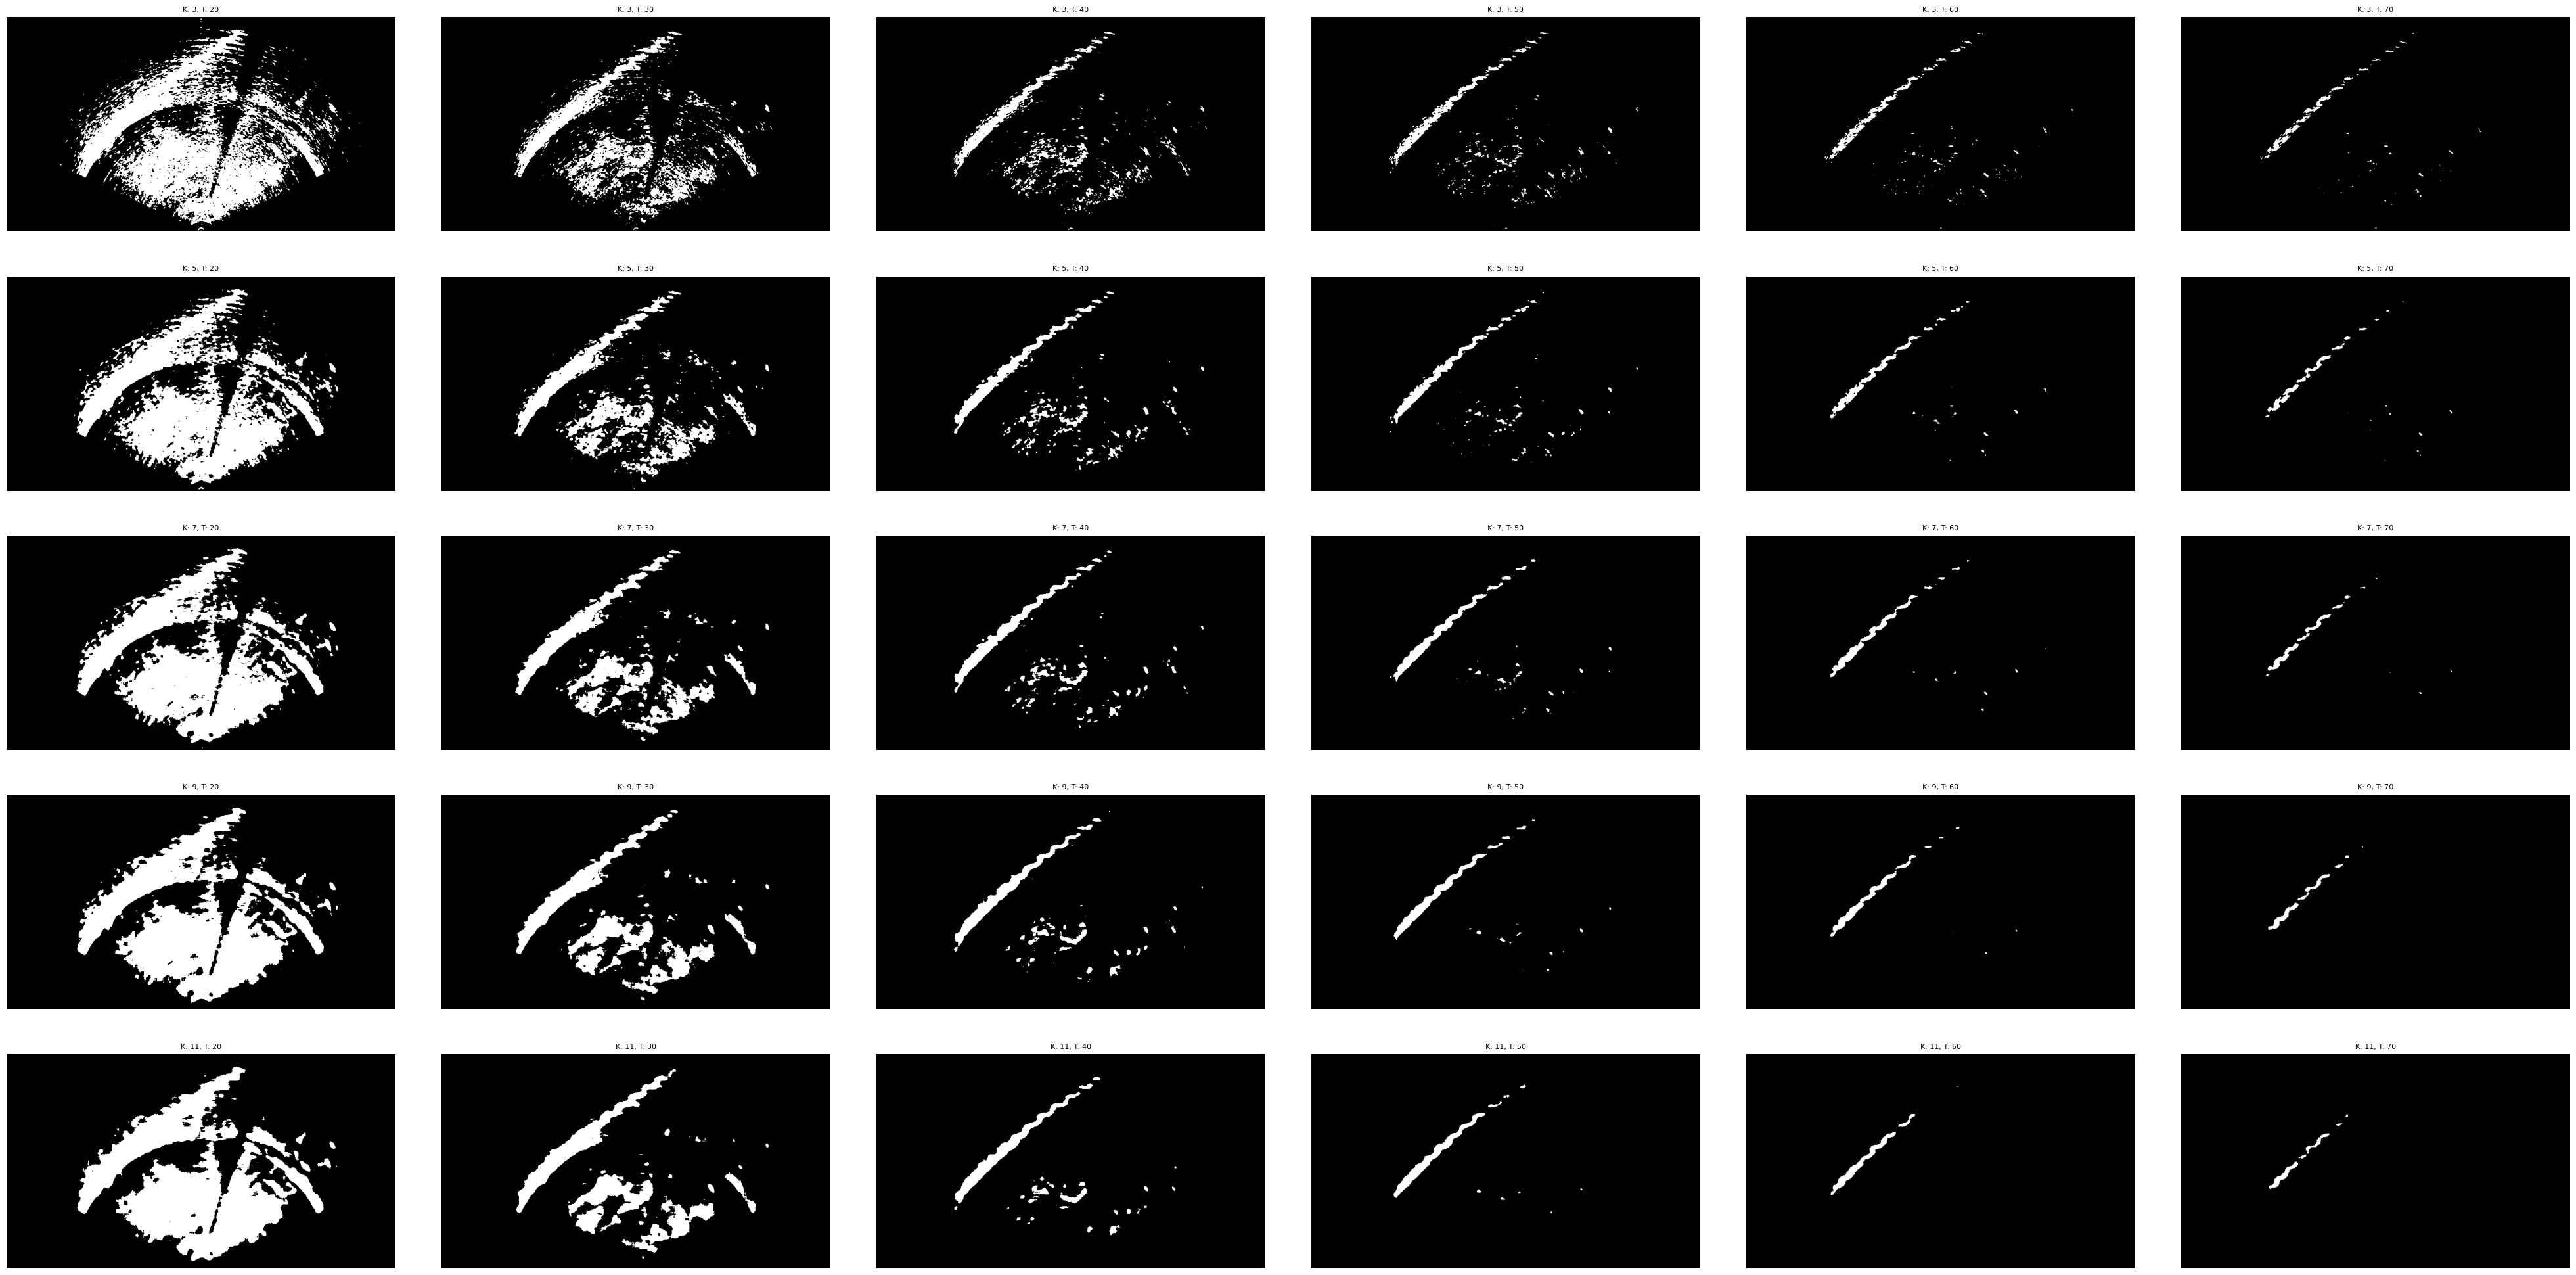

In [7]:
# Test a range of different median kernel sizes and binary thresholds
kernel_sizes = np.arange(3, 13, 2)
thresholds = np.arange(20, 80, 10)

fig, axes = plt.subplots(len(kernel_sizes), len(thresholds), figsize=(40, 20))
fig.tight_layout(pad=2.0)

for i, kernel_size in enumerate(kernel_sizes):
    for j, threshold in enumerate(thresholds):
        filtered_image = median(img, np.ones((kernel_size, kernel_size)))
        binary_image = filtered_image > threshold
        ax = axes[i, j]
        ax.imshow(binary_image, cmap="gray")
        ax.axis("off")
        ax.set_title(f"K: {kernel_size}, T: {threshold}", fontsize=8)

plt.show()

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

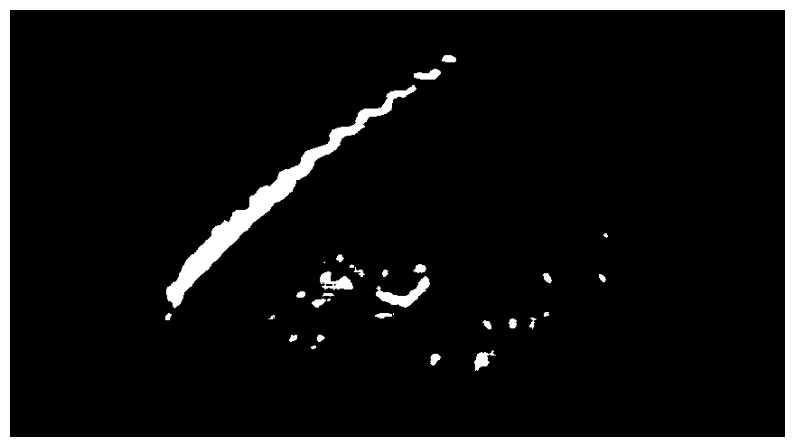

In [17]:
# Filter and threshold using values from the above tests
filtered_image = median(img, np.ones((11,11)))
binary_image = filtered_image > 40
plt.figure(figsize=(10, 6))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")

Label: 3, Area: 6289.0, Eccentricity: 1.00


(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

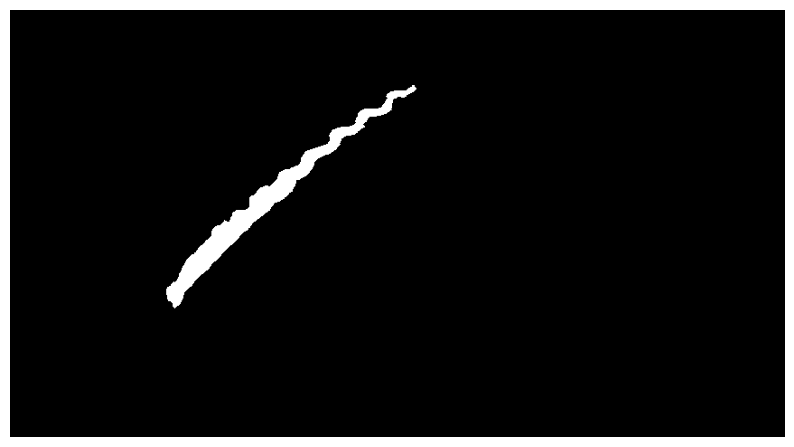

In [ ]:
# Find all blobs with 8-connectivity
label_image = label(binary_image, connectivity=2)
regions = regionprops(label_image)

# Filter out small regions and regions with low eccentricity
min_area = 1000
min_eccentricity = 0.5
filtered_regions = []
for region in regions:
    if region.area >= min_area and region.eccentricity >= min_eccentricity:
        filtered_regions.append(region)
filtered_image = np.zeros_like(label_image)
for region in filtered_regions:
    filtered_image[label_image == region.label] = 1
    print(f"Label: {region.label}, Area: {region.area}, Eccentricity: {region.eccentricity:.2f}")
plt.figure(figsize=(10, 6))
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

# Polar view

My thinking was that using polar coordinates was better than cartesian for creating an automatic threshold, because then the black background around the data wouldn't be used. However in the polar coords it is generally harder to see what is going on. So i will stick with cartesian so i know that i am segmenting the right stuff 

Image shape: (473, 512)
Range shape: (473,)
Gain shape: (473,)
Bearing shape: (512,)


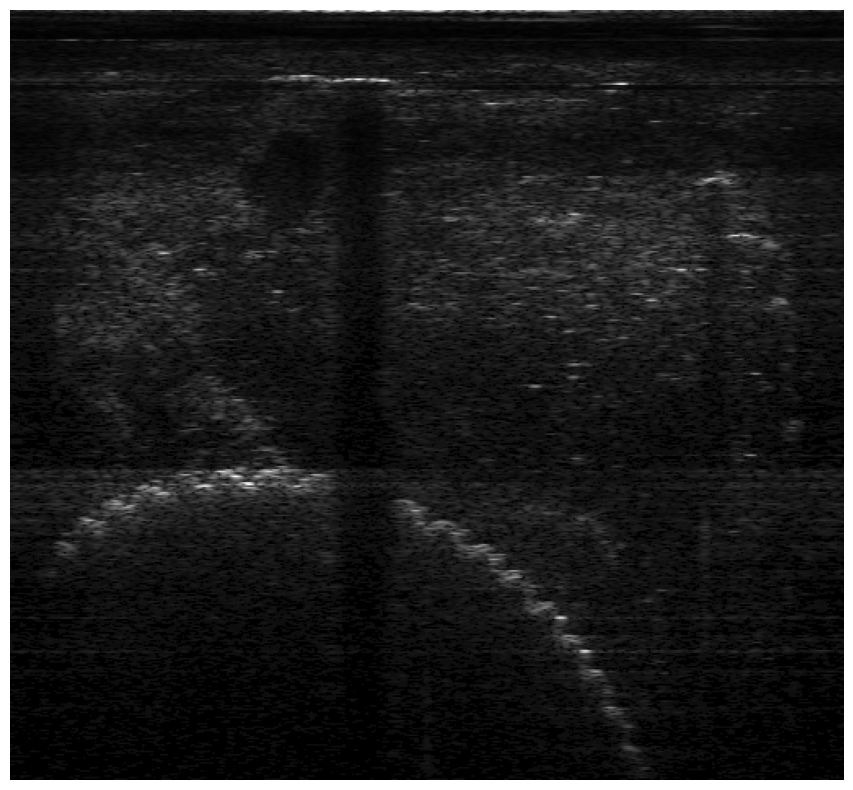

In [14]:
img_polar = np.load("samples/polar/img.npy")
range = np.load("samples/polar/range.npy")
gain = np.load("samples/polar/gain.npy")
bearing = np.load("samples/polar/bearing.npy")

# Show image
plt.figure(figsize=(20, 10))
plt.imshow(img_polar, cmap="gray")
plt.axis("off")

# Print shapes
print("Image shape:", img_polar.shape)
print("Range shape:", range.shape)
print("Gain shape:", gain.shape)
print("Bearing shape:", bearing.shape)